# 5.2 matplotlib入门


数据分析中一个重要的部分是对信息进行可视化。matplotlib是一个用于生成出版级质量的绘图包。该项目由John Hunter于2002年发起，目的在于在Python环境下进行Matlab（一种针对科学计算的软件）风格的绘图。


![MatplotlibTimeline](image/MatplotlibTimeline.png)

Matplotlib最初由John D. Hunter编写，第一个公开版本于2003年发布。Michael Droettboom在John Hunter于2012年8月去世前不久被提名为matplotlib的首席开发者，Thomas Caswell于2014年加入，他现在(2021年)是首席开发者。

## 一张图片的解剖

![MatplotlibFigureIntro](image/MatplotlibFigureIntro.png)

figure - 图形; 
title - 标题;
tick - 刻度;
axis - 轴;
label - 标签;
line - 线;
scatter plot - 散点图；
grid - 网格;
legend - 图例;
spine -  图脊;

matplotlib图形由多个元素的层次结构组成，当这些元素放在一起时，就形成了实际的图形。

任何基本部件的一个重要属性是zorder属性，它在图中指示了基本部件的虚拟深度。这个zorder值用于在渲染基本部件之前从最低到最高排序。这样就可以控制什么在什么的后面。大多数绘图者或艺术家都创建一个默认的zorder值，这样各个图形部件可以恰当的渲染。例如，图脊、刻度和刻度标签通常在实际图形的后面。

![z-order](image/z-order.png)

## 1. 一个标准绘图流程
### [1]初始化(initialize)


In [51]:
import numpy as np
import matplotlib.pyplot as plt

### [2]准备(prepare)


In [52]:
X = np.linspace(0, 8*np.pi, 1000)
Y = np.sin(X)

### [3] 渲染(Render)


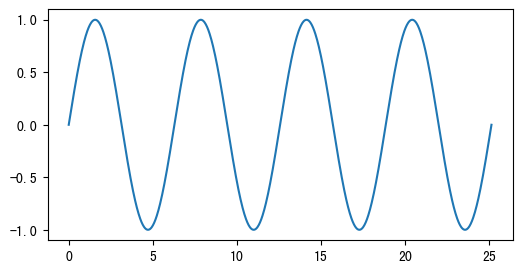

In [53]:
fig, ax = plt.subplots(figsize=(6,3))   # 很重要！！！ 生成一个空的图形 
ax.plot(X, Y, '-')         # 绘制别的图形，只需要修改这里
plt.show()                # 很重要！！！显示绘制的图形

### 练习
参照上述3个步骤绘制曲线 $y = x^2 + 2$

## 2. 微调样式

你可以修改图形中的任何内容，包括颜色、标记、线条宽度和样式、刻度和刻度标签、标题等。

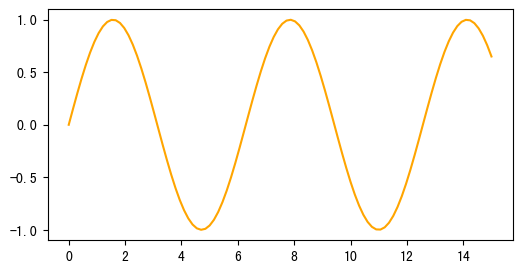

In [44]:
fig, ax = plt.subplots(figsize=(6,3))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y, color='orange')
plt.show()

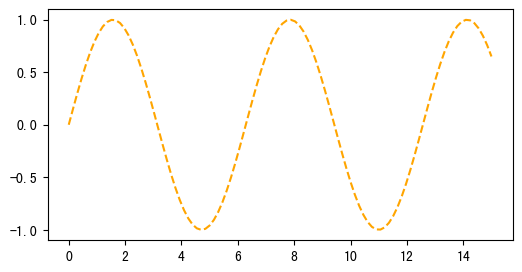

In [45]:
fig, ax = plt.subplots(figsize=(6,3))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y, color='orange', linestyle='--')
plt.show()

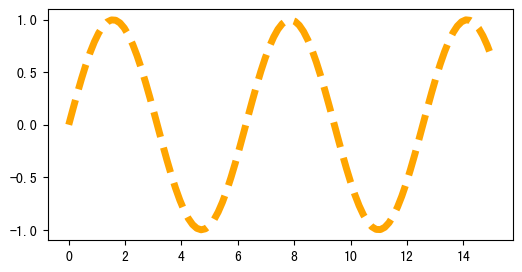

In [43]:
fig, ax = plt.subplots(figsize=(6,3))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y, color='orange', linestyle='--', linewidth=5)
plt.show()

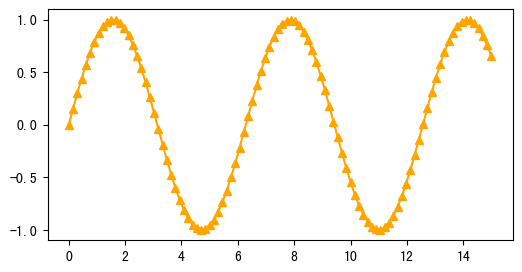

In [46]:
fig, ax = plt.subplots(figsize=(6,3))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y, color='orange',  marker="^")
plt.show()

## 3. 组织多个变量

你可以在同一个图形里绘制多个数据，当然，你也可以将一个图形分割成多个子图。

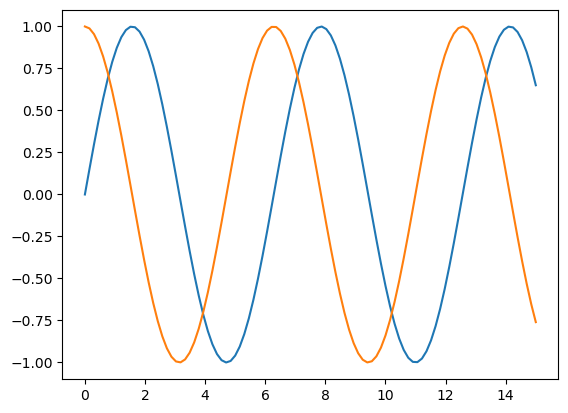

In [15]:
fig, ax = plt.subplots(figsize=(6,3))
X = np.linspace(0, 15, 100)
Y1, Y2 = np.sin(X), np.cos(X)
ax.plot(X, Y1)
ax.plot(X, Y2)
plt.show()

```
nrows - 子图的行数
ncols - 子图的列数
```

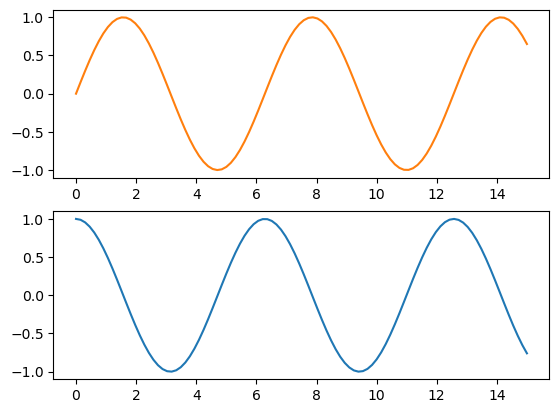

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1) 
X = np.linspace(0, 15, 100)
Y1, Y2 = np.sin(X), np.cos(X)
ax[0].plot(X, Y1, color='C1')
ax[1].plot(X, Y2, color='C0')
plt.show()

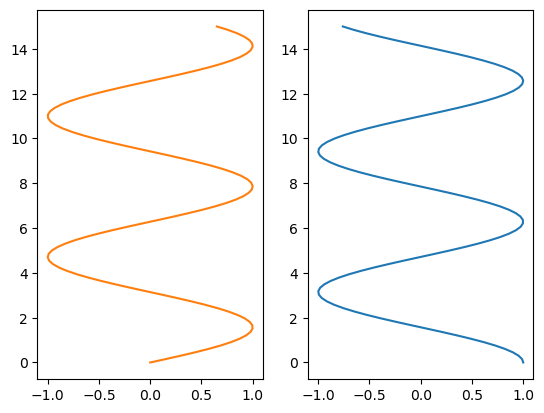

In [17]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2)
X = np.linspace(0, 15, 100)
Y1, Y2 = np.sin(X), np.cos(X)
ax1.plot(Y1, X, color='C1')
ax2.plot(Y2, X, color='C0')
plt.show()

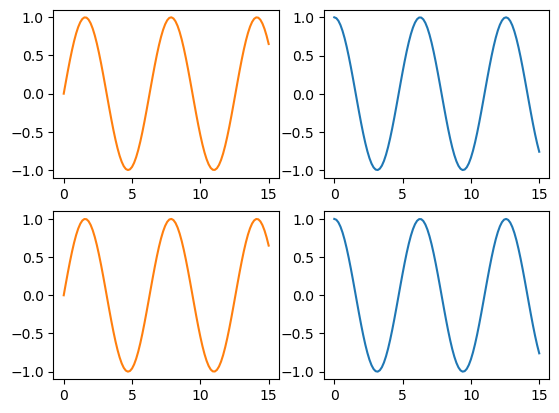

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2) 
X = np.linspace(0, 15, 100)
Y1, Y2 = np.sin(X), np.cos(X)
ax[0, 0].plot(X, Y1, color='C1')
ax[0, 1].plot(X, Y2, color='C0')
ax[1, 0].plot(X, Y1, color='C1')
ax[1, 1].plot(X, Y2, color='C0')
plt.show()

## 4. 添加标签

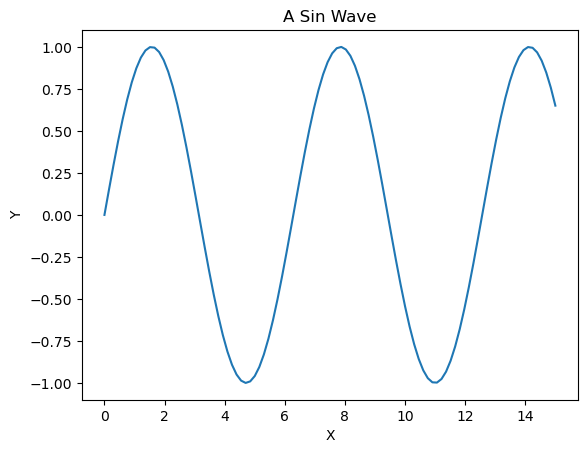

In [20]:
fig, ax = plt.subplots(figsize=(6,3))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y)
ax.set_title('A Sin Wave')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

## 5. 添加文本


有时候，我们需要在图形上添加文本标注。在pyplot模块里，使用pyplot.text()函数能够在任意位置添加文本，其语法如下：
```python
matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=False, **kwargs)
```
```
x：横轴数据
y：纵轴数据
s：需要标注的文本
```

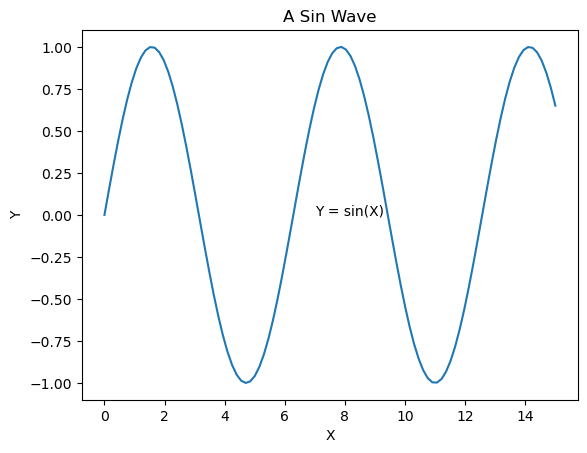

In [21]:
fig, ax = plt.subplots(figsize=(6,3))
X = np.linspace(0, 15, 100)
Y = np.sin(X)
ax.plot(X, Y)
ax.set_title('A Sin Wave')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.text(7, 0, 'Y = sin(X)')  #添加文本
plt.show()

## 6. 图形大小

Matplotlib中的原始图形尺寸单位是英寸，源自印刷行业标准。但是，用户可能需要以厘米或像素等其他单位指定图形。

在`plt.subplots`里添加figsize参数，控制图形大小，figsize是一个tuple类型的参数（长和宽）

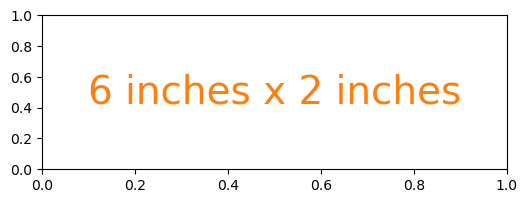

In [22]:
plt.subplots(figsize=(6, 2))
text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
plt.text(0.5, 0.5, '6 inches x 2 inches', **text_kwargs)
plt.show()

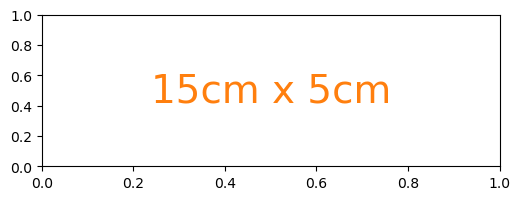

In [23]:
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(15*cm, 5*cm))
plt.text(0.5, 0.5, '15cm x 5cm', **text_kwargs)
plt.show()

关于尺寸，可以阅读: [Figure size in different units](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html)

## 7. 保存图片到文件
你可以使用`plt.savefig`将绘制的图片从内存保存到文件。例如将图片保存为jpg格式，你只需要输入以下代码：
```python
plt.savefig('figpath/fig_name.jpg')
```
有几个重要的选项，如dpi，它控制每英寸点数的分辨率。
```python
plt.savefig('figpath/fig_name.jpg', dpi=400)
```
保存的格式支持'png', 'jpg', 'pdf', 'svg', 'ps', 'eps', ...

## 8. 应用绘制流程

### 8.1 散点图

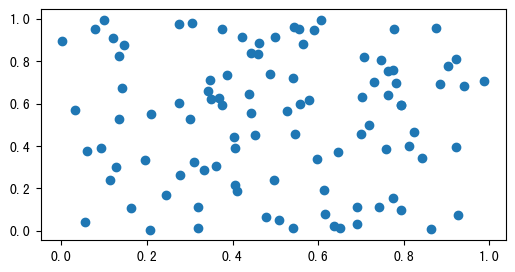

In [49]:
# step1 ------------------------
import numpy as np
import matplotlib.pyplot as plt
# step2 ------------------------
X = np.random.uniform(0, 1, 100)
Y = np.random.uniform(0, 1, 100)
# step3 ------------------------
fig, ax = plt.subplots(figsize=(6,3))  
ax.scatter(X, Y)               # 散点图的语句
plt.show()

### 练习

给定x数据[-0.76,  0.59, -1.36, -0.61, -0.78,  0.87,  0.11, -0.82,  0.45, -0.33] 和y数据[-0.85, -1.11,  0.16, -0.74,  1.09, -0.82,  0.32, -1.11, -1.22, -0.07]，绘制散点图。

### 8.2 柱状图

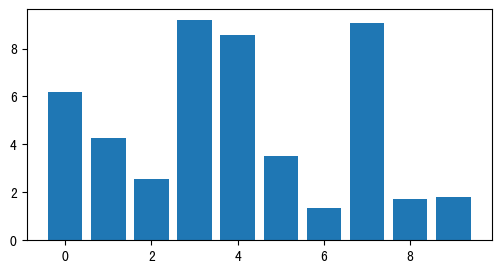

In [48]:
# step1 ------------------------
import numpy as np
import matplotlib.pyplot as plt
# step2 ------------------------
X = np.arange(10)
Y = np.random.uniform(1,10,10)
# step3 ------------------------
fig, ax = plt.subplots(figsize=(6,3))
ax.bar(X, Y)                 # 柱状图的语句
plt.show()

### 8.3 饼状图

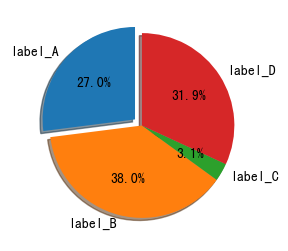

In [38]:
# step1 ------------------------
import numpy as np
import matplotlib.pyplot as plt
# step2 ------------------------
X = np.random.uniform(0, 1, 4)
# step3 ------------------------
fig, ax = plt.subplots()
labels = [ 'label_A', 'label_B', 'label_C', 'label_D']
autopct='%1.1f%%'
explode = (0.1, 0, 0, 0)
ax.pie(X, labels=labels,
          autopct=autopct,
          explode=explode,
          shadow=True,
          startangle=90)                    # 饼状图的语句
plt.show()

### 8.4 频数图

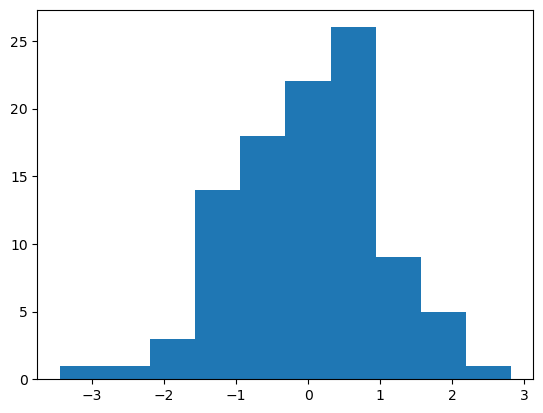

In [8]:
import numpy as np
import matplotlib.pyplot as plt
Z = np.random.normal(0, 1, 100)
fig, ax = plt.subplots()      
ax.hist(Z)                # hist的语句   histogram
plt.show()

### 8.5 箱形图

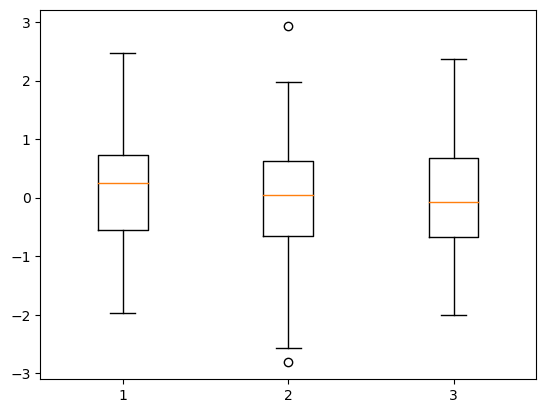

In [9]:
# step1
import numpy as np
import matplotlib.pyplot as plt

# step2
Z = np.random.normal(0, 1, (100,3))

# step3
fig, ax = plt.subplots()
ax.boxplot(Z)
plt.show()

### 8.6 折线图

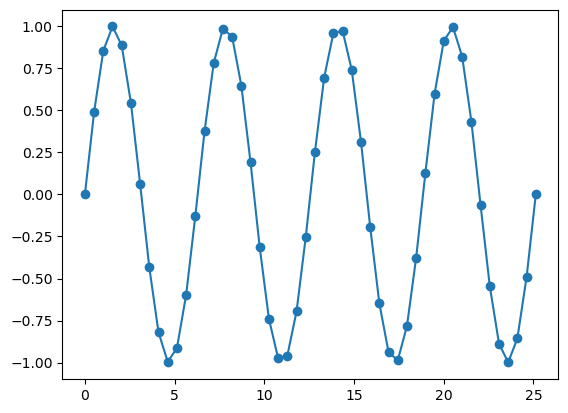

In [10]:
X = np.linspace(0, 8*np.pi, 50)
Y = np.sin(X)
fig, ax = plt.subplots()   
ax.plot(X, Y, '-o')         # 绘制折线图
plt.show()                

## 推荐扩展阅读：

Nicolas P.Rougier, Scientific Visualization: Pyhon & Matplotlib[M], https://github.com/rougier/scientific-visualization-book/